<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/Jamboree_Model_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
d=pd.read_csv("Jamboree_Admission.csv")
d

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


##Exploratory Data Analysis

In [58]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [59]:
d.shape

(500, 9)

In [60]:
d.describe(include="all")

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


From the Above, we can infer the following
* Higer the GRE and TOEFEL Score higher the chances of getting admitted
* Higher the CGPA, Higher the chances of of getting admitted
* This shows that those who perform well in academics(CGPA), also perform well in Communication skills(GRE,TOEFEL score)
* High performers have higher rating interms of their SOP,LOR and higher chances of getting admitted in top university based on the ratings

In [61]:
# to check the presence of null values
d.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [62]:
df=d.drop(["Serial No."],axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [63]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [64]:
df.rename(columns={"LOR ":"LOR","Chance of Admit ":"Chance of Admit"})

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


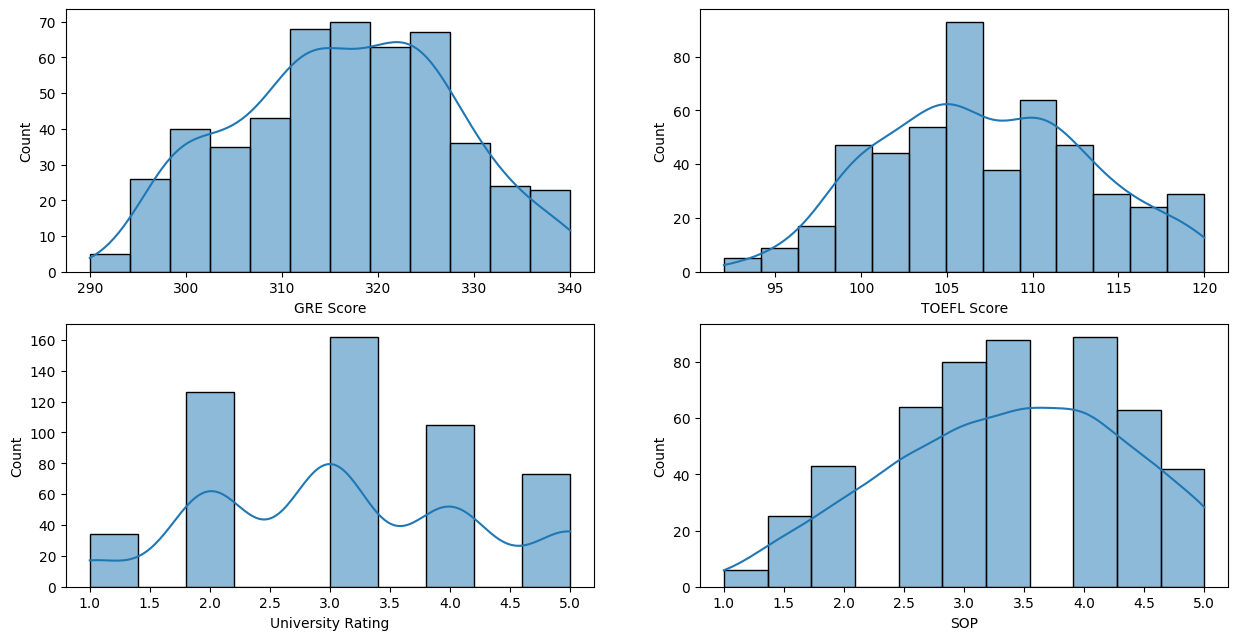

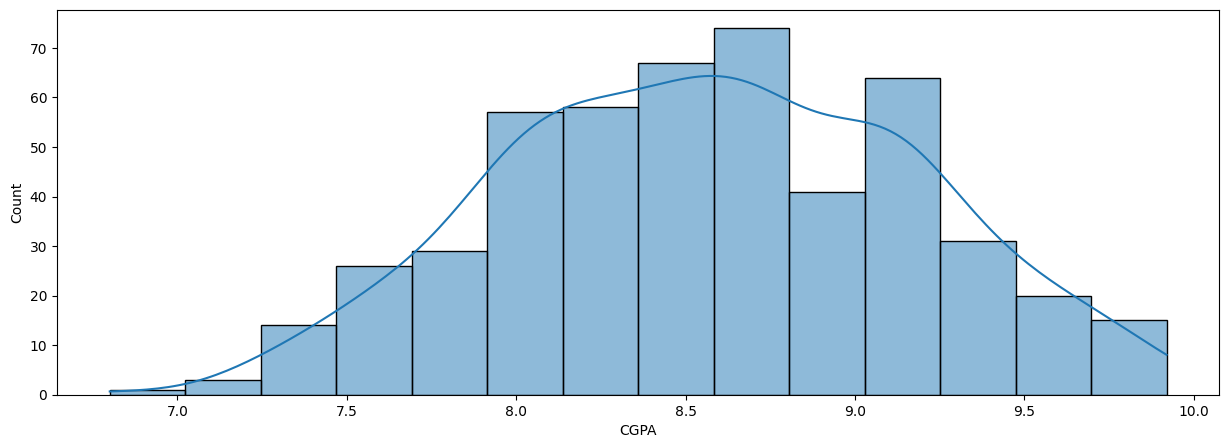

In [65]:
column_cat=["GRE Score","TOEFL Score","University Rating","SOP","CGPA"]
index=0
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(15,7.5))

index=0
for row in range(2):
  for col in range(2):
    sns.histplot(df[column_cat[index]],ax=axis[row,col],kde=True)
    index +=1
plt.show()

fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.histplot(df[column_cat[-1]], kde=True)
plt.show()

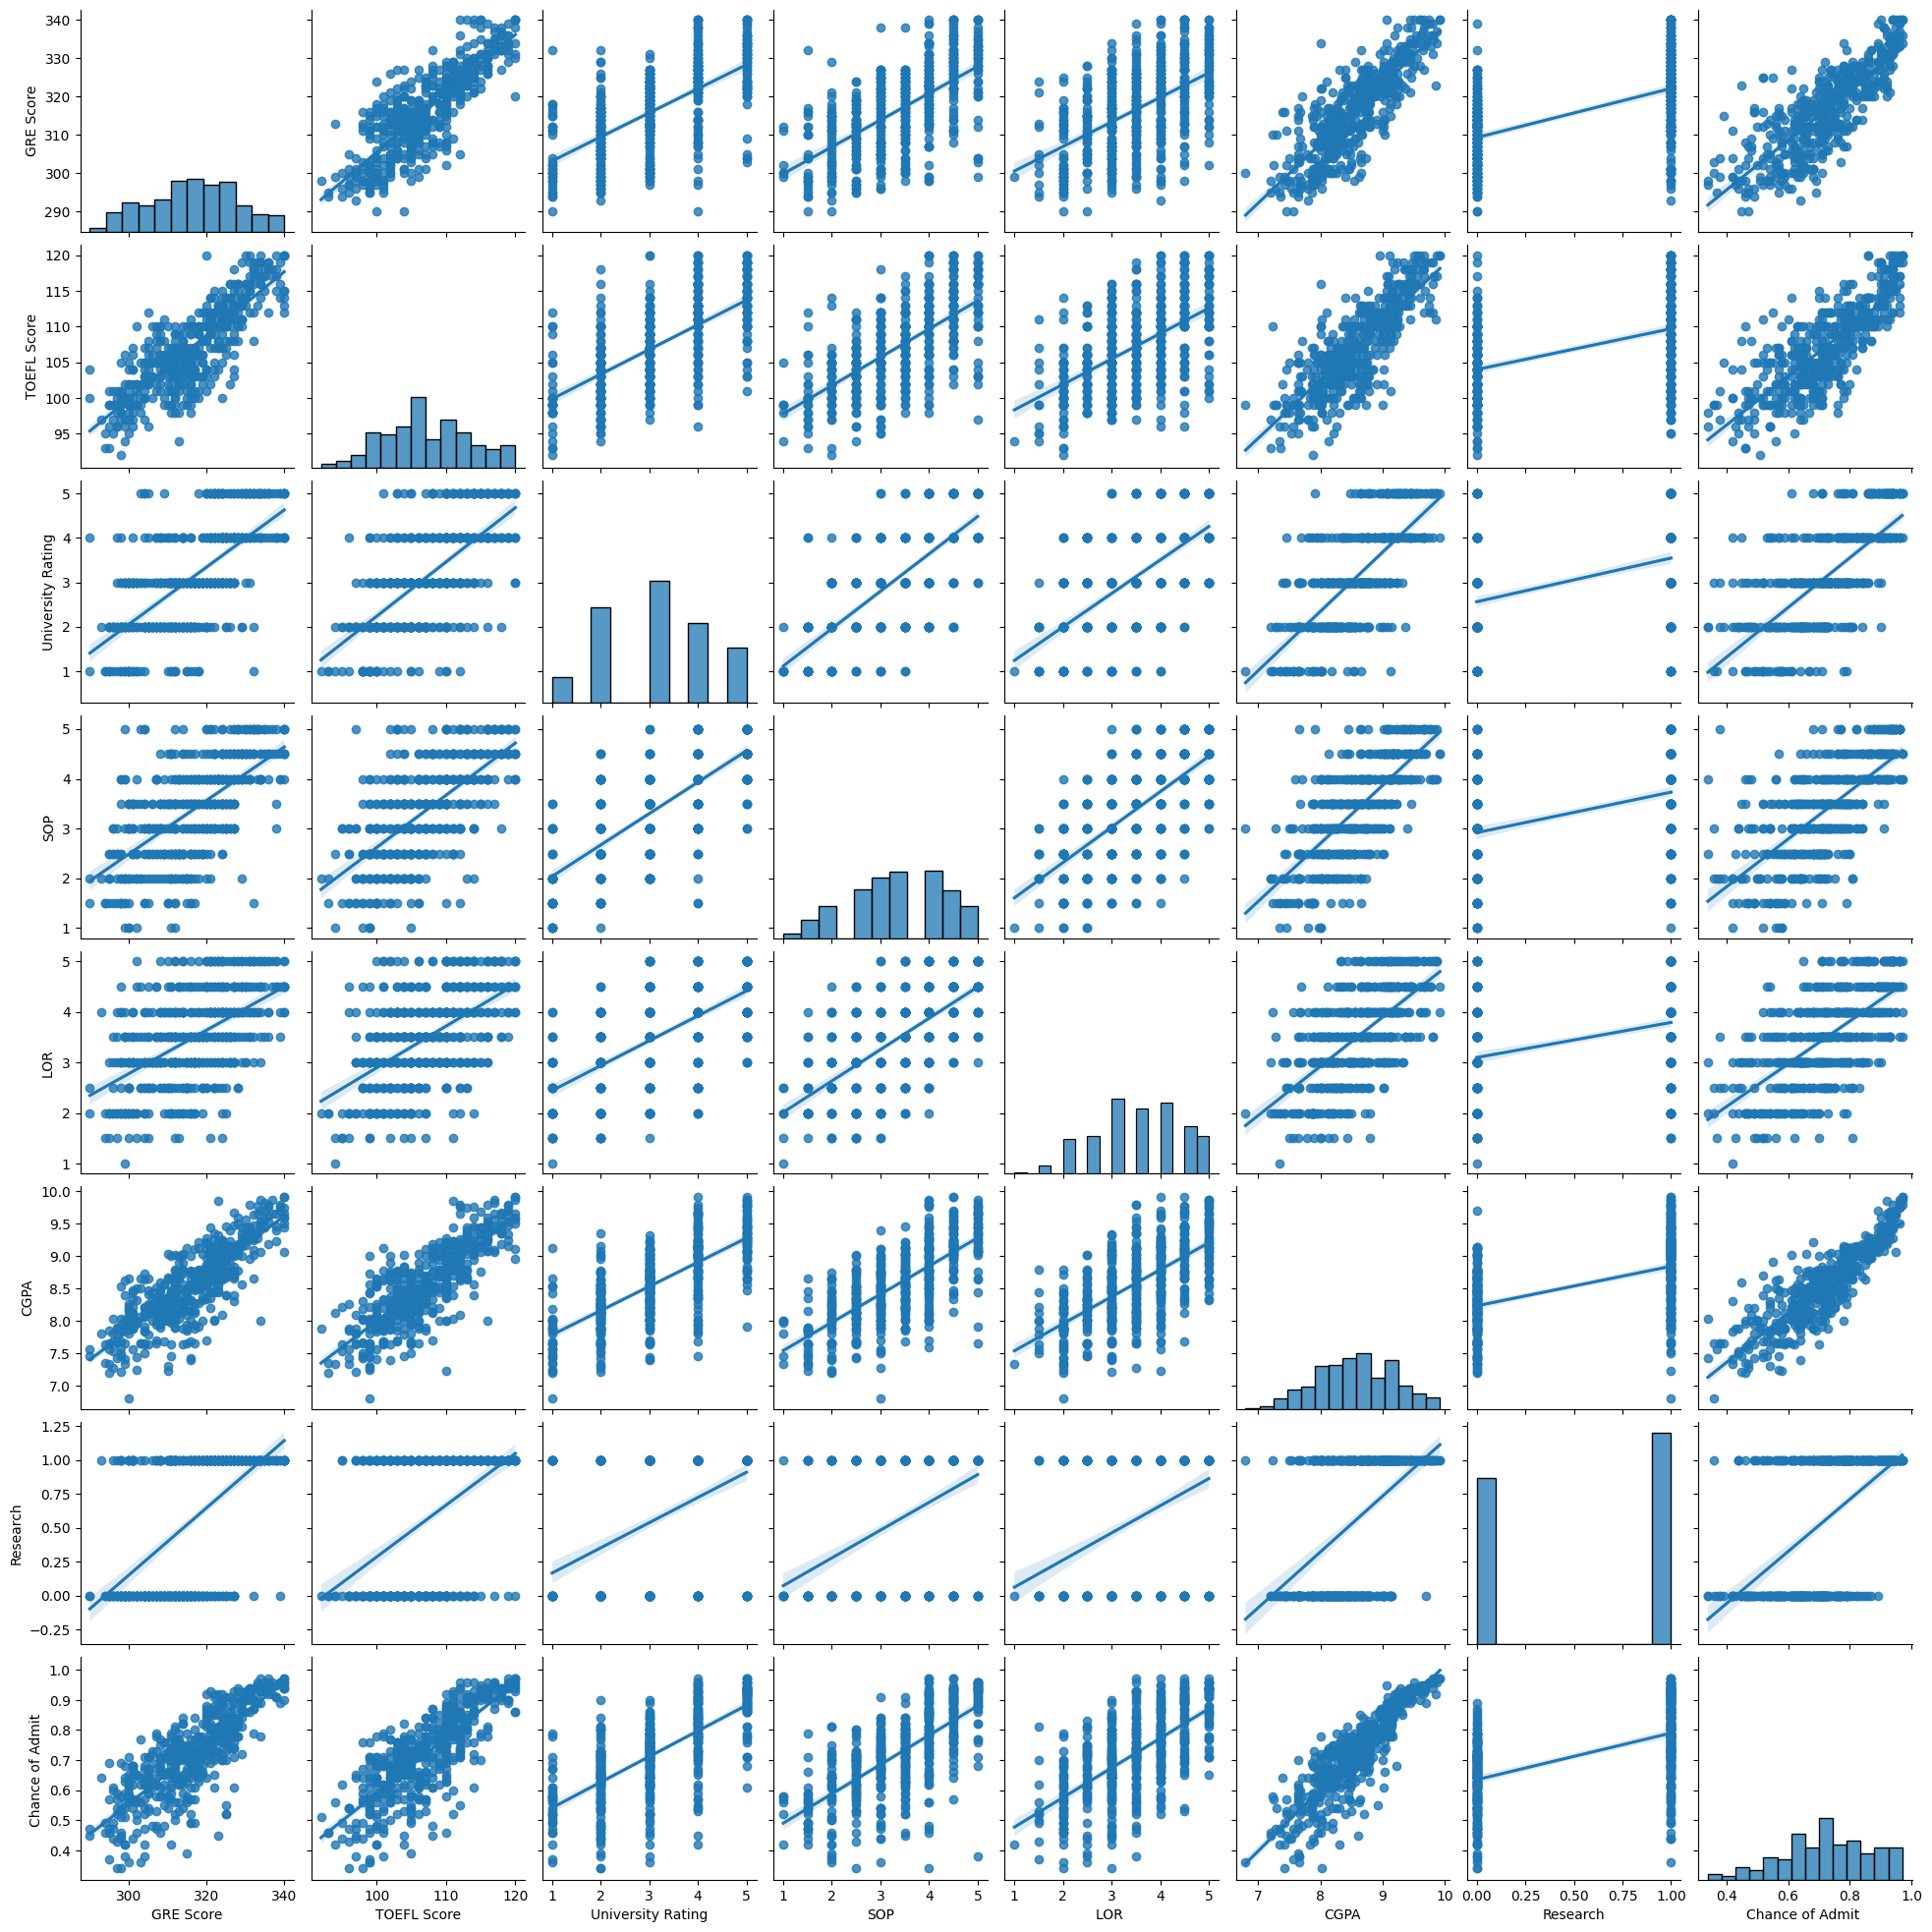

In [66]:
sns.pairplot(data=df,kind="reg")

<Axes: >

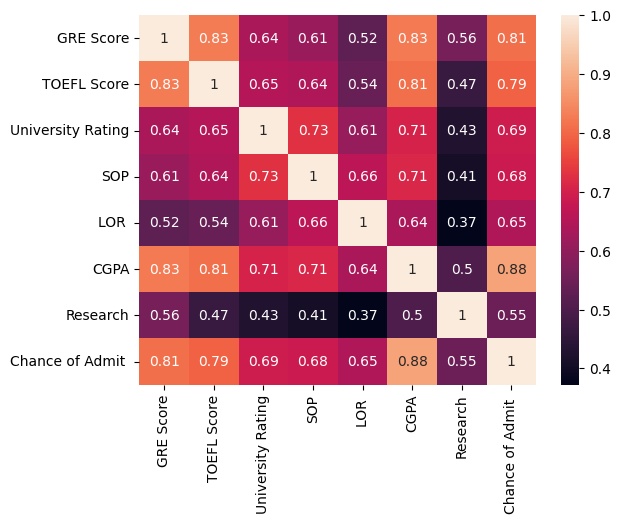

In [67]:
sns.heatmap(data=df.corr(),annot=True)

Inference

* GRE,TOEFEL,CGPA are highly correlated with the chance of admission
* LOR,SOP are not a great factor interms of admission, but its slightly coorelated- kind of basic requirement for the admission irrespective of the performacne of the students
* Research has lesser impact compared to other features in terms of admission

## Data Processing - Model Creation

In [68]:
from sklearn.model_selection import train_test_split

X=df.drop(["Chance of Admit "],axis=1)
y=df["Chance of Admit "]

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=24)


In [70]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
211,328,110,4,5.0,4.0,9.14,1
84,340,115,5,4.5,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0
118,296,99,2,3.0,3.5,7.28,0
126,323,113,3,4.0,3.0,9.32,1
...,...,...,...,...,...,...,...
401,315,105,2,3.0,3.0,8.34,0
343,305,103,2,2.5,3.5,8.13,0
192,322,114,5,4.5,4.0,8.94,1
387,307,105,2,2.0,3.5,8.10,0


In [71]:
y_train

211    0.82
84     0.94
398    0.67
118    0.47
126    0.85
       ... 
401    0.66
343    0.59
192    0.86
387    0.53
418    0.60
Name: Chance of Admit , Length: 400, dtype: float64

In [72]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

In [73]:
X_train_std

array([[ 1.02896501,  0.46243464,  0.79167159, ...,  0.59699789,
         0.94538701,  0.90911166],
       [ 2.08139034,  1.28894873,  1.67869858, ...,  1.13972324,
         1.45841978,  0.90911166],
       [-0.37426876, -0.6946851 , -0.0953554 , ...,  0.59699789,
         0.34960701, -1.09997489],
       ...,
       [ 0.50275235,  1.12364591,  1.67869858, ...,  0.59699789,
         0.61439812,  0.90911166],
       [-0.81277931, -0.36407946, -0.98238239, ...,  0.05427254,
        -0.7757552 , -1.09997489],
       [-0.63737509,  0.62773746, -0.98238239, ...,  0.59699789,
        -0.89160131, -1.09997489]])

In [74]:
X_test_std

array([[ 0.41505024,  0.79304028, -0.0953554 , -0.38175787,  1.13972324,
         0.63094756,  0.90911166],
       [-0.02346031,  0.46243464, -0.0953554 ,  0.65002017,  1.13972324,
         0.34960701,  0.90911166],
       [ 0.67815657,  0.9583431 ,  0.79167159,  1.16590918,  0.59699789,
         0.36615645, -1.09997489],
       [ 0.9412629 , -0.52938228,  1.67869858, -0.38175787,  0.05427254,
         0.44890368,  0.90911166],
       [-1.51439619, -2.18241047, -1.86940938, -2.44531395, -2.65935424,
        -2.03351297, -1.09997489],
       [-1.16358775, -1.19059356, -0.98238239, -0.38175787,  0.05427254,
        -0.84195298,  0.90911166],
       [ 1.99368823,  1.12364591,  1.67869858,  0.65002017,  1.13972324,
         1.97145255,  0.90911166],
       [ 1.64287979,  1.78485719,  1.67869858,  1.16590918,  0.05427254,
         1.44187033,  0.90911166],
       [ 1.90598612,  1.78485719,  0.79167159, -0.38175787,  1.13972324,
         1.37567256,  0.90911166],
       [ 0.50275235,  0.4624

In [75]:
X_train=pd.DataFrame(X_train_std, columns=X_train.columns)
X_test=pd.DataFrame(X_test_std, columns=X_test.columns)

In [76]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.028965,0.462435,0.791672,1.681798,0.596998,0.945387,0.909112
1,2.081390,1.288949,1.678699,1.165909,1.139723,1.458420,0.909112
2,-0.374269,-0.694685,-0.095355,0.134131,0.596998,0.349607,-1.099975
3,-1.777503,-1.355896,-0.982382,-0.381758,0.054273,-2.132810,-1.099975
4,0.590454,0.958343,-0.095355,0.650020,-0.488453,1.243277,0.909112
...,...,...,...,...,...,...,...
395,-0.111162,-0.364079,-0.982382,-0.381758,-0.488453,-0.378569,-1.099975
396,-0.988184,-0.694685,-0.982382,-0.897647,0.054273,-0.726107,-1.099975
397,0.502752,1.123646,1.678699,1.165909,0.596998,0.614398,0.909112
398,-0.812779,-0.364079,-0.982382,-1.413536,0.054273,-0.775755,-1.099975


In [77]:
X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,0.415050,0.793040,-0.095355,-0.381758,1.139723,0.630948,0.909112
1,-0.023460,0.462435,-0.095355,0.650020,1.139723,0.349607,0.909112
2,0.678157,0.958343,0.791672,1.165909,0.596998,0.366156,-1.099975
3,0.941263,-0.529382,1.678699,-0.381758,0.054273,0.448904,0.909112
4,-1.514396,-2.182410,-1.869409,-2.445314,-2.659354,-2.033513,-1.099975
...,...,...,...,...,...,...,...
95,-0.374269,-0.364079,-0.982382,-1.413536,-1.031178,-0.196525,-1.099975
96,0.064242,-1.025291,-0.095355,-0.381758,-1.573904,-1.040546,0.909112
97,0.502752,-0.033474,-0.095355,0.134131,0.054273,-0.179975,0.909112
98,0.327348,0.462435,1.678699,1.681798,1.139723,1.077783,0.909112


In [78]:
# Linear Regression model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)
y_pred=lr.predict(X_test)

rsquare_error=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("r2 score:",rsquare_error)
print("MAE:",mae)
print("RMSE:",rmse)
print("AdjustedR2:",1 - ( 1-r2_score(y_test,y_pred)) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 ))

r2 score: 0.8174673275904598
MAE: 0.04310970202831316
RMSE: 0.054501608837379166
AdjustedR2: 0.8142078155831466


In [79]:
lr.coef_

array([0.02184042, 0.01249718, 0.00931224, 0.00334534, 0.01564483,
       0.07426036, 0.01153387])

In [80]:
lr.intercept_

0.71765

In [81]:
# lasso Linear Regression model

lr1=Lasso(alpha=0.1)
lr1.fit(X_train,y_train)
lr1.score(X_train,y_train)
y_pred1=lr1.predict(X_test)
r2_score(y_test,y_pred1)

rsquare_error=r2_score(y_test,y_pred1)
mae=mean_absolute_error(y_test,y_pred1)
rmse=np.sqrt(mean_squared_error(y_test,y_pred1))
print("r2 score:",rsquare_error)
print("MAE:",mae)
print("RMSE:",rmse)
print("AdjustedR2:",1 - ( 1-r2_score(y_test,y_pred1)) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 ))

r2 score: 0.3082894143289955
MAE: 0.08599208385284628
RMSE: 0.10609654154473025
AdjustedR2: 0.2959374395848704


In [82]:
lr1.coef_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02720286, 0.        ])

In [83]:
lr1.intercept_

0.7176500000000001

In [84]:
# Ridge Linear Regression model

lr2=Ridge(alpha=0.1)
lr2.fit(X_train,y_train)
print("train_Score:",lr2.score(X_train,y_train))
y_pred2=lr2.predict(X_test)
r2_score(y_test,y_pred2)

rsquare_error=r2_score(y_test,y_pred2)
mae=mean_absolute_error(y_test,y_pred2)
rmse=np.sqrt(mean_squared_error(y_test,y_pred2))
print("r2 score:",rsquare_error)
print("MAE:",mae)
print("RMSE:",rmse)
print("AdjustedR2:",1 - ( 1-r2_score(y_test,y_pred2)) * ( len(y_train) - 1 ) / ( len(y_train) - X_train.shape[1] - 1 ))

train_Score: 0.8207522908847482
r2 score: 0.8174987918180023
MAE: 0.04310669645096011
RMSE: 0.05449691125391273
AdjustedR2: 0.8142398416718952


In [85]:
lr2.coef_

array([0.02185952, 0.01251966, 0.00931668, 0.00336125, 0.01565117,
       0.07418781, 0.01153644])

In [86]:
lr2.intercept_

0.71765

# Inference

* CGPA is the most important feature in getting admitted
* Followed by GRE,TOEFEL score act as imp factor in geting admiited
* the model train and test performace almost similar , a perfect fit model - the performace is better in normal and ridge linear regression , lasso regression doesn't perform well up to the other models , can fine tune the alpha further to check its performance further



## Model using Library - Stats model

In [87]:
import statsmodels.api as sm
X_train=sm.add_constant(X_train)
model=sm.OLS(y_train.values,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.4
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          4.81e-142
Time:                        11:22:16   Log-Likelihood:                 551.76
No. Observations:                 400   AIC:                            -1088.
Df Residuals:                     392   BIC:                            -1056.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7177      0.00

In [99]:
X_test=sm.add_constant(X_test)
sm_pred=model.predict(X_test)
r2_score(y_test,sm_pred)

0.8174673275904597

In [95]:
X_train_new=X_train.drop(columns=("University Rating"))
X_train_new=X_train_new.drop(columns=("SOP"))

In [96]:
model1 = sm.OLS(y_train.values, X_train_new).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     354.6
Date:                Sat, 13 Apr 2024   Prob (F-statistic):          2.19e-143
Time:                        11:34:03   Log-Likelihood:                 548.91
No. Observations:                 400   AIC:                            -1086.
Df Residuals:                     394   BIC:                            -1062.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7177      0.003    232.203      

## Assumptions Test - Linear Regression

In [100]:
#VIF for all features must be less than 5, to prove there is no multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X_t=pd.DataFrame(X_train,columns=X_train.columns)
vif["Features"]=X_t.columns
vif["VIF"]=[variance_inflation_factor(X_t.values,i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
6,CGPA,4.97
1,GRE Score,4.51
2,TOEFL Score,3.96
4,SOP,2.86
3,University Rating,2.50
5,LOR,2.02
7,Research,1.49
0,const,1.00


* there is no multi collinearity between the features in the dataset

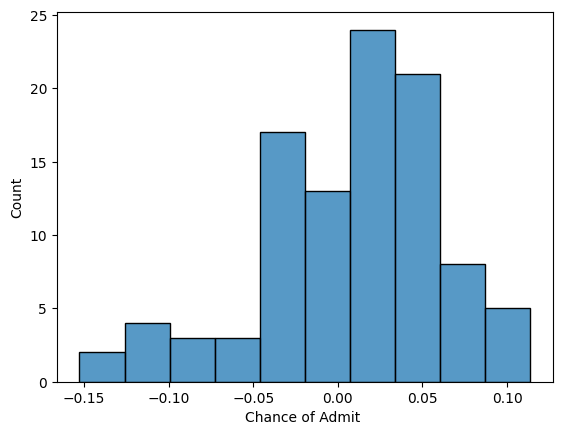

In [114]:
# residuals are normally distributed
residual = y_test-y_pred
sns.histplot(residual)
plt.show()

In [122]:
#Mean of residuals should be close to zero
residual.mean()

0.00920186421712253

* Errors are normally distributed and the means of error is close to zero

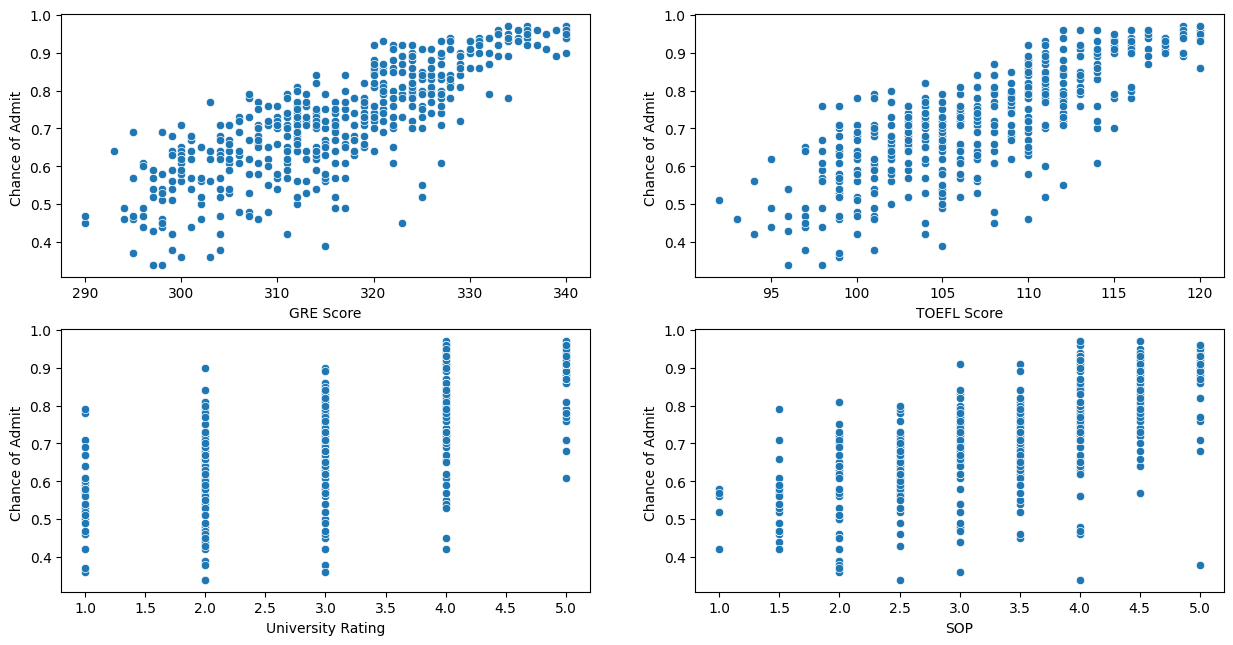

In [135]:
column_cat=["GRE Score","TOEFL Score","University Rating","SOP","CGPA"]
index=0
fig,axis=plt.subplots(nrows=2,ncols=2,figsize=(15,7.5))

index=0
for row in range(2):
  for col in range(2):
    sns.scatterplot(x=df[column_cat[index]],y=df["Chance of Admit "],ax=axis[row,col])
    index +=1
plt.show()




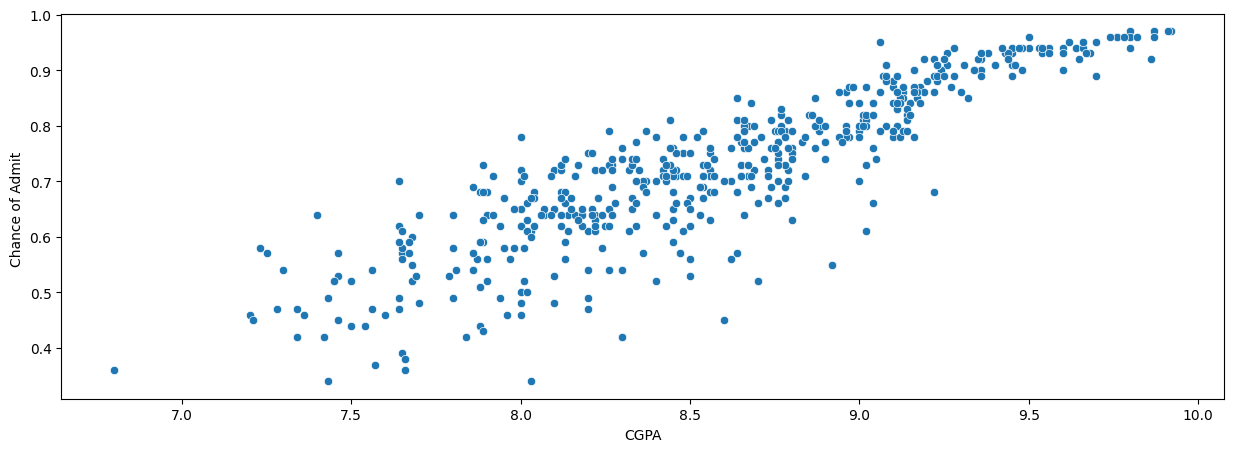

In [136]:
fig,axis=plt.subplots(nrows=1,ncols=1,figsize=(15,5))
sns.scatterplot(x=df[column_cat[-1]],y=df["Chance of Admit "])
plt.show()

* as already stated, there exist a linear relationship between the features and the label

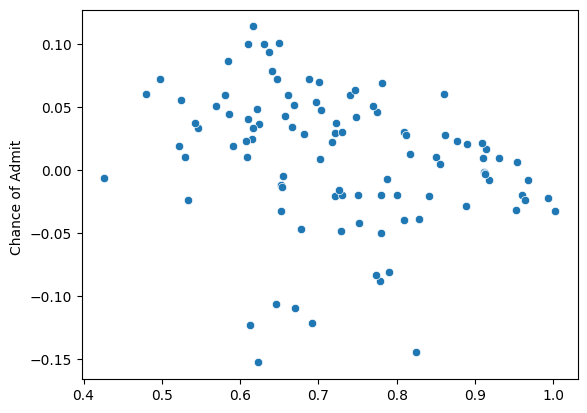

In [119]:
#Test for Homoscedasticity
sns.scatterplot(x=y_pred,y=residual)
plt.show()

In [148]:
#goldfelt quant test for homoskedascity

#null hypothesis: dataset has homoskedascity
#alternate hypothesis: dataset has heteroskedascity
alpha=0.05
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F statistics','p-value']
test=sms.het_goldfeldquandt(residual,X_test)
p_value=test[1]

if p_value<alpha:
  print("Reject null hypothesis & data has heteroskedascity")
else:
  print("Fail to reject null hypothesis & data has homoskedascity")


Fail to reject null hypothesis & data has homoskedascity


* There is homoskedascity within the dataset, hence the model is reliable and there are no outliers present

## Summary

* Students who wants to get admitted in high ranked university must maintain high CGPA and score higher in Toefel and GRE exam
* In terms of Model - Linear Regression and Ridge Regression has ability to predict better and has a r2 score nearly 82%
* The chance are low for students who score moderate in CGPA,GRE,TOEFEL in high ranked university , high interms of moderate rated universities
* Can add more features such as Other curricular activites which demonstrates their other skills such as leadership,Team work,Initiatives,achievements to support their chance of getting admitted in high rated universites apart from Exam scores